In [131]:
#imports
# import utils.analysis as analysis
import matplotlib.pyplot as plt
import tifffile as tif
import numpy as np
from tqdm import tqdm
import pandas as pd
# import roifile as roi
from read_roi import read_roi_zip as co_zip
import cv2
import os
import matplotlib.cm as cm
import seaborn as sns

In [132]:
Roi_path = '/Users/aichah/Desktop/TLI/data/tli_cols/TLI_Cols_zip/'
Roi_path_adult = '/Users/aichah/Desktop/TLI/data/columns/'

In [133]:
from os import listdir
from os.path import isfile, join
zip_files = [f for f in listdir(Roi_path) if isfile(join(Roi_path, f))]
zip_files = [f for f in zip_files if '.zip' in f]

In [134]:
from os import listdir
from os.path import isfile, join
zip_adult = [f for f in listdir(Roi_path_adult) if isfile(join(Roi_path_adult, f))]
zip_adult = [f for f in zip_adult if '.zip' in f]

In [135]:
all_centers = {}
for file in zip_files:
    file_name = file[:17]
    cols_zip = co_zip(Roi_path+file)
    centers = {}
    for col, val in cols_zip.items():
        if val['type'] == 'oval':
            x = val['left']+int(val['width']/2); a = int(val['width']/2)  # x center, half width                                       
            y = val['top']+int(val['height']/2); b = int(val['height']/2) 
            centers[col] = np.array([x,y])
    # for col, val in centers.items():
    #     centers[col] = val - centers['0,0']
    all_centers[file_name] = centers

In [136]:
all_centers_adult = {}
for file in zip_adult:
    file_name = file[:17]
    cols_zip = co_zip(Roi_path_adult+file)
    centers = {}
    for col, val in cols_zip.items():
        if val['type'] == 'oval':
            x = val['left']+int(val['width']/2); a = int(val['width']/2)  # x center, half width                                       
            y = val['top']+int(val['height']/2); b = int(val['height']/2) 
            centers[col] = np.array([x,y])
    # for col, val in centers.items():
    #     centers[col] = val - centers['0,0']
    all_centers_adult[file_name] = centers

In [118]:
cols = ['0,0', '0,1', '1,1', '0,-1', '1,0', '-1,-1',  '-1,0']

In [121]:
all_centers_adult1 = {}
for neu, val in all_centers_adult.items():
    all_centers_adult1[neu] = {col:coor for col, coor in val.items() if col in cols}

In [122]:
all_centers1 = {}
for neu, val in all_centers.items():
    all_centers1[neu] = {col:coor for col, coor in val.items() if col in cols}

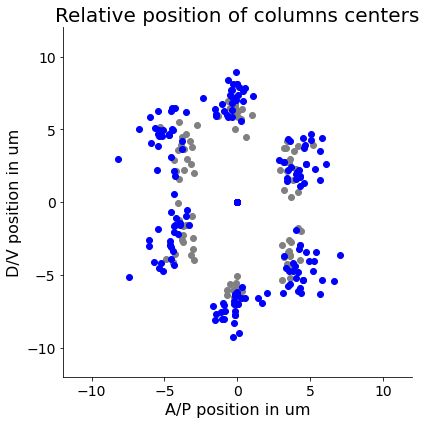

In [130]:
# colors = ['b','r','g','gray','purple','orange','cyan','k']
fig = plt.gcf()
fig.set_size_inches(8, 6, forward=True)
for ind, neu in enumerate(all_centers1):
    y_fact = all_centers1[neu]['0,0'][1]
    x_fact = all_centers1[neu]['0,0'][0]
    coor_x = (np.array(list(all_centers1[neu].values()))[:,0] - x_fact) * 0.076
    coor_y = (np.array(list(all_centers1[neu].values()))[:,1] - y_fact) * 0.076
    plt.scatter(coor_x,coor_y,c='grey', label='TLI') 
for ind, neu in enumerate(all_centers_adult1):
    y_fact = all_centers_adult1[neu]['0,0'][1]
    x_fact = all_centers_adult1[neu]['0,0'][0]
    coor_x = (np.array(list(all_centers_adult1[neu].values()))[:,0] - x_fact) * 0.076
    coor_y = (np.array(list(all_centers_adult1[neu].values()))[:,1] - y_fact) * 0.076
    plt.scatter(coor_x,coor_y,c='blue', label='adult')
plt.title('Relative position of columns centers', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('D/V position in um', fontsize=16)
plt.xlabel('A/P position in um', fontsize=16)
sns.despine()
plt.axis([-12, 12, -12, 12])
plt.gca().set_aspect('equal')
# plt.axis('equal')
plt.tight_layout()
# plt.legend(bbox_to_anchor=(1.01, 0.97), loc=2, borderaxespad=0., prop={'size': 10})
# plt.legend(["TLI", "adult"], loc ="lower right")
fig_name = 'relative_position_of_colums_centers_TLI_vs_adult_in_blue.pdf'
plt.savefig(fig_name, bbox_inches='tight')

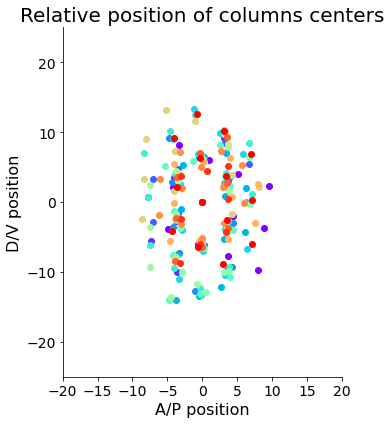

In [98]:
# colors = ['b','r','g','gray','purple','orange','cyan','k']
fig = plt.gcf()
fig.set_size_inches(8, 6, forward=True)
# ax = fig.add_subplot()
colors = cm.rainbow(np.linspace(0, 1, len(zip_files)))
for ind, neu in enumerate(all_centers):
    y_fact = all_centers[neu]['0,0'][1]
    x_fact = all_centers[neu]['0,0'][0]
    coor_x = (np.array(list(all_centers[neu].values()))[:,0] - x_fact) * 0.076
    coor_y = (np.array(list(all_centers[neu].values()))[:,1] - y_fact) * 0.076
    plt.scatter(coor_x,coor_y,c=colors[ind], label=neu) 
plt.title('Relative position of columns centers', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('D/V position', fontsize=16)
plt.xlabel('A/P position', fontsize=16)
sns.despine()
plt.axis([-20, 20, -25, 25])
plt.gca().set_aspect('equal')
# plt.axis('equal')
plt.tight_layout()
# plt.legend(bbox_to_anchor=(1.01, 0.97), loc=2, borderaxespad=0., prop={'size': 10})
fig_name = 'TLI_relative_position_of_colums_centers_1.pdf'
plt.savefig(fig_name, bbox_inches='tight')

In [157]:
all_centers.keys()

dict_keys(['211121_P36.5_N2_R', '211104_P36_N2_R27', '220209_P36_N1_Fli', '211121_P36.5_N1_R', '211028_P36_N1_R22', '211114_P36_N2_Fli', '211114_P36_N1_Fli', '211107_P36_N1_R26', '211113_P36_N2_Fli', '211113_P36_N1_Fli', '211107_P36_N2_R25', '211011_P37_N1_Fli', '220127_P36_N1_Z30', '211104_P36_N3_R29', '211104_P36_N1_R26', '211107_P36_N3_R25', '211121_P36.5_N3_R'])

In [153]:
test = all_centers['211114_P36_N1_Fli']
# factor = test['0,0']
# for col, val in test.items():
#     test[col] = val - factor
test

{'0,0': array([166, 199]),
 '0,1': array([164, 113]),
 '1,1': array([215, 163]),
 '1,0': array([211, 254]),
 '0,-1': array([164, 286]),
 '-1,-1': array([115, 251]),
 '-1,0': array([116, 165]),
 '-2,-1': array([ 64, 208]),
 '-2,0': array([ 68, 119]),
 '-1,1': array([113,  75]),
 '0,-2': array([152, 363]),
 '-1,-2': array([105, 332]),
 '-2,-2': array([ 57, 292]),
 '2,0': array([206, 335]),
 '0,2': array([162,  37]),
 '2,1': array([217,  77]),
 '1,2': array([259, 215]),
 '1,-1': array([254, 311])}

In [70]:
cent_col = np.array([f['0,0'] for f in list(all_centers.values())])

In [71]:
dorsal_col = np.array([f['0,1'] for f in list(all_centers.values())])
# ventral_col = np.array([f['0,-1'] for f in list(all_centers.values())])
# side_col1 = np.array([f['1,1'] for f in list(all_centers.values())])
# side_col2 = np.array([f['1,0'] for f in list(all_centers.values())])
# side_col3 = np.array([f['-1,0'] for f in list(all_centers.values())])
# side_col4 = np.array([f['-1,-1'] for f in list(all_centers.values())])

In [72]:
(dorsal_col - cent_col).mean(axis=0)

array([ -1.70588235, -81.35294118])

In [73]:
(-94.4516129 - -81.35294118) * 0.076

-0.9954990507199999

In [65]:
(dorsal_col - cent_col).mean(axis=0)

array([ -1.12903226, -94.4516129 ])

In [63]:
(ventral_col - cent_col).std(axis=0)

array([[  22,  -91],
       [  -2,  -98],
       [  -2,  -83],
       [   7,  -87],
       [  -2,  -85],
       [   4,  -77],
       [ -11,  -98],
       [ -15,  -99],
       [ -20, -107],
       [   0,  -81],
       [ -14, -106],
       [  27,  -82],
       [  -2, -102],
       [ -13,  -91],
       [  41,  -82],
       [   3,  -87],
       [   2, -118],
       [  -2, -102],
       [  -3, -109],
       [  -3,  -89],
       [  -4, -122],
       [  19,  -87],
       [   0,  -92],
       [ -12,  -93],
       [ -12, -106],
       [  -3,  -92],
       [   0,  -92],
       [ -19, -101],
       [   0,  -83],
       [   1,  -92],
       [ -22,  -94]])

In [48]:
np.linalg.norm((side_col1 - cent_col)), np.linalg.norm((side_col2 - cent_col)), np.linalg.norm((side_col4 - cent_col))

(281.3485382936972, 252.90116646626998, 288.62952031973447)

In [61]:
np.linalg.norm((dorsal_col - cent_col))

534.5474721668787

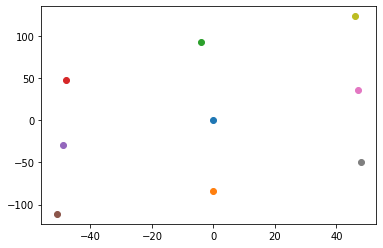

In [21]:
 for col, val in centers.items():
    val = np.array(val) - np.array(centers['0,0'])
    plt.scatter(val[0],val[1])

In [18]:
np.array(centers['0,0']) - np.array(centers['0,0'])

array([0, 0])

In [11]:
centers = {}
for col, val in cols_zip.items():
    x = val['left']+int(val['width']/2); a = int(val['width']/2)  # x center, half width                                       
    y = val['top']+int(val['height']/2); b = int(val['height']/2) 
    centers[col] = (x,y)
    # print(col, (y,x))

In [49]:
image_path = '/Users/aichah/Desktop/TLI/data/cntrl/220511_TLI_cntl_P56_S01_B5B_Fh_R40_N1_Td_GFP_seg.tif'
# cols_path = '/Users/aichah/Desktop/TLI/data/cols/T4-4 (subtype B)/Aicha/T4_4b_FlipV_R20_Cols_1.tif'
Roi_path = '/Users/aichah/Desktop/TLI/data/cntrl/220511_TLI_cntl_P56_S01_B5B_Fh_R80_N1_Td_ColROIs.zip'
save_path = '/Users/aichah/Desktop/TLI/data/cntrl/'
save_name = '220511_TLI_cntl_P56_S01_B5B_Fh_R40_N1_Td_GFP1_test'

##
# entry_point = (0,38,185,225) #entry point of the neuron (T,Z,Y,X), where Z=0

if save_path[-1] != '/':
    save_path += '/'

In [50]:
image = tif.imread(image_path)
# Cols = tif.imread(cols_path)
cols_zip = rois = co_zip(Roi_path)
neuron = image.copy()

In [51]:
neuron.min(), np.quantile(neuron,0.99), neuron.mean(), neuron.max()

(0.0, 0.0, 0.003105291, 1.0)

In [52]:
neuron[neuron>0] = 1
# Cols[Cols>0] = 1

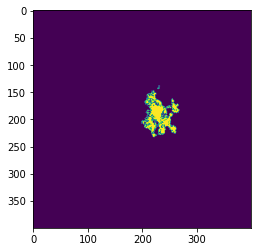

In [53]:
plt.imshow(neuron[15])

In [54]:
neuron.sum()

37490.0

In [55]:
# neuron = neuron[np.newaxis,:]
# neuron.shape

In [68]:
cols_zip.keys()

odict_keys(['1_00', '2_+10', '3_+1+1', '4_0+1', '5_-10', '6_-1-1', '7_0-1', 'B_+2+1', 'D_+1+2', 'A_+20', 'G_-20', 'F_-1+1', 'H_-2-1', 'J_-2-1', 'E_0+2', 'L_+1-1', 'K_0-2', 'C_+2+2', 'I_-2-2'])

In [31]:
# rois = np.array(list(zip(cols_zip['C']['x'],cols_zip['C']['y'])))
# rois = rois.astype(int)
# test = np.zeros([1024,1024])
# test = cv2.fillPoly(test, pts =[rois], color=(255,255,255))
# plt.imshow(test)

In [32]:
# test[test>0]  = 1

In [42]:
def col_occupancy(neuron, cols_zip, normalize=True, plot=True, save=True, save_path='', save_file=''):
    cols_occ = {}
    for key, val in tqdm(cols_zip.items()):
        if val['type'] == 'oval':
            x0 = val['left']+int(val['width']/2); a = int(val['width']/2)  # x center, half width                                       
            y0 = val['top']+int(val['height']/2); b = int(val['height']/2)  # y center, half height                                      
            x = np.linspace(0, neuron.shape[-2],neuron.shape[-1])  # x values of interest
            y = np.linspace(0, neuron.shape[-2],neuron.shape[-1])[:,None]  # y values of interest, as a "column" array
            column = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse
            column = column.astype(int)
        elif val['type'] == 'freehand':
            rois = np.array(list(zip(val['x'],val['y'])))
            rois = rois.astype(int)
            column = np.zeros([neuron.shape[-2],neuron.shape[-1]])
            column = cv2.fillPoly(column, pts =[rois], color=(255,255,255))
            column[column>0] = 1
        col_filter = np.broadcast_to(column, neuron.shape)
        # filter = filter.copy()
        # filter -= filter.min()
        # filter = filter/filter.max()
        col_size = col_filter.sum()
        nue_sub = col_filter * neuron # pixels occupied by neuron in the column
        cols_occ[key] = nue_sub.sum()/col_size
    cols_occ = pd.Series(cols_occ)
    if normalize:
        cols_occ = cols_occ/cols_occ.max()
    if save == True:
        if save_file == '':
            save_file = "col_occupancy.csv"
        csv_file = save_path+save_file
        if '.csv' not in csv_file:
            csv_file +='.csv'
        cols_occ.to_csv(csv_file, sep=';')

    return cols_occ

In [34]:
T4_4b_Cols_Ai = col_occupancy(neuron, cols_zip, normalize=True, plot=True, save=True, save_path=save_path, save_file=save_name)

100%|██████████| 21/21 [00:00<00:00, 55.69it/s]


In [1]:
def vect_alpha(vect, ref):
    """
    This function takes a point cloud of (N,D) and calculates the angles between these vectors and the ref vector (tuple)
    all vectors are assumed to start from center
    return angles calculated as numpy (N,1)
    """
    unit_vector_1 = vect/np.linalg.norm(vect)
    unit_vector_2 = ref / np.linalg.norm(ref)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    vect_deg = np.degrees(angle)
    return vect_deg

120 130
(30, -30) (0, 50) [ 0.70710678 -0.70710678] [0. 1.]
2.356194490192345 135.0
1
81.51947863075975 166 35 36


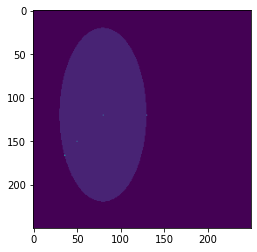

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Drawing the ellipse
x0 = 80; a = 50  # x center, half width                                       
y0 = 120; b = 100  # y center, half height 
x = np.linspace(0, 250,250)  # x values of interest
y = np.linspace(0, 250,250)[:,None]  # y values of interest, as a "ellipse" array
ellipse = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse
ellipse = ellipse.astype(int)

#definning center, start (Sy,Sx) and point-of-interest (y,x)
S_radian = np.radians(0)
Sy, Sx = int(y0+b*np.sin(S_radian)), int(x0+a*np.cos(S_radian))
print(Sy, Sx)
y, x = 150, 50
ellipse[y0,x0] = 5
ellipse[Sy,Sx] = 5
ellipse[y,x] = 5

#getting angle (in radians) between start and point-of-interest
vect, ref = (y-y0,x-x0), (Sy-y0,Sx-x0)
unit_vector_1 = vect/np.linalg.norm(vect)
unit_vector_2 = ref / np.linalg.norm(ref)
print(vect, ref, unit_vector_1, unit_vector_2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
p_radian = np.arccos(dot_product)
p_deg = np.degrees(p_radian)
# if vect[0]<0: ### this is a stupid solution to make the angle clockwise, but it works here
#     p_deg = 360 - p_deg
#     p_radian = np.radians(p_deg)
print(p_radian, p_deg)

### THE CORRECT POINTS ARE (FROM THE SHAPE and CONFIRMED BY ANGLE FROM START)
Py2, Px2 = 166, 36 ###angle between (25-y0,25-x0) and (10,0) is 71.56 (measured online)
print(ellipse[Py2,Px2])
ellipse[Py2,Px2] = 10

#finding the point based on the angle, center and diameters
# Py, Px = int(y0+b*np.sin(p_radian)), int(x0+a*np.cos(p_radian))  THIS SOLUTION DIDN't WORK
if vect[-1]<0:
    Px1 = int(x0-a*b/(np.sqrt(b**2+a**2*np.tan(p_radian)**2))) 
elif vect[-1]>0:
    Px1 = int(x0+a*b/(np.sqrt(b**2+a**2*np.tan(p_radian)**2))) 
#### Px1 is off by 1 only
Py1 = y0+(Px1-x0)/np.arctan(p_radian)
# Py1 = int(y0+a*b/(np.sqrt(a**2+b**2*np.tan(p_radian)**2)))
print(Py1, Py2, Px1, Px2)
plt.imshow(ellipse)


In [26]:
Px1 = x0+a*b/(np.sqrt(b**2+a**2*np.tan(p_radian)**2))
Py1 = y0+a*b/(np.sqrt(a**2+b**2*np.tan(p_radian)**2))
# Py1 = Px1*np.tan(p_radian)
Px1, Py1, p_radian, p_deg

(23.71390676354104, 41.99007438041998, 1.3734007669450157, 78.69006752597979)

40 30


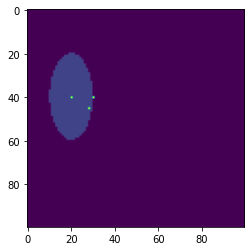

In [123]:
import numpy as np
import matplotlib.pyplot as plt
x0 = 0+int(20); a = int(20/2)  # x center, half width                                       
y0 = 0+int(40); b = int(40/2)  # y center, half height                                      
x = np.linspace(0, 100,100)  # x values of interest
y = np.linspace(0, 100,100)[:,None]  # y values of interest, as a "column" array
column = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse
column = column.astype(int)
column[45,28] = 5
column[y0,x0] = 5
y, x = 45, 28
R_radian = np.radians(0)
Ry, Rx = int(y0+b*np.sin(R_radian)), int(x0+a*np.cos(R_radian))
print(Ry,Rx)
column[Ry,Rx] = 5
# column[60,10] = 5
plt.imshow(column)

In [126]:
Ry,Rx

(40, 30)

In [118]:
vect = (y-y0,x-x0)
angle = vect_alpha(vect, (Ry-y0,Rx-x0))
P_radian = np.radians(angle)
angle, P_radian

(32.005383208083494, 0.5585993153435624)

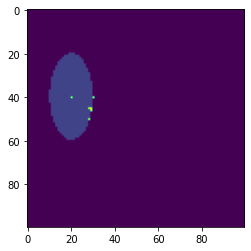

In [122]:
angle = 18
P_radian = np.radians(angle)
Py, Px = int(y0+b*np.sin(P_radian)), int(x0+a*np.cos(P_radian))
# print(Ry,Rx)
column[Py,Px] = 5
plt.imshow(column)

In [49]:
np.radians(90)

1.5707963267948966

In [ ]:
rois = np.array(list(zip(cols_zip['2']['x'],cols_zip['2']['y'])))
rois = rois.astype(int)
test = np.zeros([1024,1024])
test = cv2.fillPoly(test, pts =[rois], color=(255,255,255))
plt.imshow(test)

In [68]:
def col_occupancy(neuron, cols, plot=True, save=True, save_path='', save_file=''):
    cols_hist = {}
    ind = 0
    for col in tqdm(cols, desc='calculating Col occupancy', leave=False):
        ind += 1
        cols_hist['col_'+str(ind)] = []
        filter = np.broadcast_to(col, neuron.shape)
        filter = filter.copy()
        filter -= filter.min()
        filter = filter/filter.max()
        col_size = filter.sum()
        nue_sub = filter * neuron # pixels occupied by neuron in the column
        # for t in tqdm(nue_sub, leave=False):
        cols_hist['col_'+str(ind)].append(nue_sub.sum()/col_size)
    #convert the results to dataframe
    occupancy = pd.DataFrame(cols_hist)  
    # if save_path != '' and save_path[-1] != '/':
    #     save_path += '/'
    # if plot:
    #     fig_name = save_path+save_file+'_col_occupancy.pdf'
    #     #ploting the results
    #     plt.figure(figsize=(8, 6), dpi=80)
    #     cols = list(cols_hist.keys())
    #     for col in cols:
    #         plt.plot(occupancy.timepoints, occupancy[col], label=col)
    #     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #     plt.title('Column Occupancy')
    #     plt.ylabel("\n".join(wrap('Column Occupancy [a.u.]',30)))
    #     plt.xlabel("Hours After Puparium Formation [h]")
    #     plt.savefig(fig_name, bbox_inches='tight')
    
    # if save == True:
    #     if save_file == '':
    #         save_file = "col_occupancy.csv"
    #     csv_file = save_path+save_file
    #     if '.csv' not in csv_file:
    #         csv_file +='.csv'
    #     occupancy.to_csv(csv_file, sep=';')
    return occupancy

In [69]:
T4_4b_Cols_Ai = col_occupancy(neuron, Cols, plot=True, save=True, save_path='', save_file='')

calculating Col occupancy:  95%|█████████▌| 19/20 [00:06<00:00,  3.23it/s]/var/folders/5d/tj6rj8cn7_xdplpgkz202g5rnq_4v2/T/ipykernel_30202/3240750036.py:10: RuntimeWarning: invalid value encountered in true_divide
  filter = filter/filter.max()


In [70]:
T4_4b_Cols_Ai

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20
0,0.985699,0.969371,0.980607,0.960109,0.980025,0.935903,0.940126,0.899597,0.893014,0.957344,0.870015,0.875321,0.905705,0.927187,0.931213,0.933284,0.93046,0.935005,0.922964,NaN


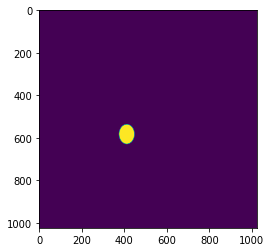

In [81]:
import numpy as np
from matplotlib import pyplot

x0 = 376+int(73/2); a = int(73/2)  # x center, half width                                       
y0 = 537+int(92/2); b = int(92/2)  # y center, half height                                      
x = np.linspace(0, 1024, 1024)  # x values of interest
y = np.linspace(0, 1024, 1024)[:,None]  # y values of interest, as a "column" array
ellipse = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse

pyplot.imshow(ellipse)

In [50]:
neuron[neuron>0] = 1
neuron.max()

1

In [53]:
filter = np.broadcast_to(ellipse, neuron.shape)
filter = filter.copy()
filter.max()

True

In [55]:
filter = np.broadcast_to(ellipse, neuron.shape)
filter = filter.copy()
filter[filter==True] = 1
# filter -= filter.min()
# filter = filter/filter.max()
col_size = filter.sum()
nue_sub = filter * neuron # pixels occupied by neuron in the column

In [57]:
nue_sub.shape

(51, 1024, 1024)

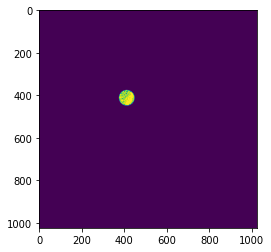

In [59]:
plt.imshow(nue_sub[30])

In [49]:
neuron[neuron>0] = 1
test = neuron.sum()
test = test*ellipse
test.max()

42730066

In [45]:
test = neuron.sum()
test[ellipse==False] = 0
plt.imshow(test)

TypeError: 'numpy.uint64' object does not support item assignment

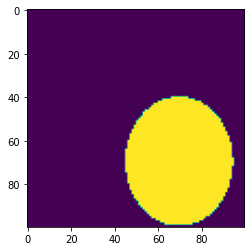

In [33]:
import numpy as np
from matplotlib import pyplot

x0 = 4; a = 5  # x center, half width                                       
y0 = 2; b = 3  # y center, half height                                      
x = np.linspace(-10, 10, 100)  # x values of interest
y = np.linspace(-5, 5, 100)[:,None]  # y values of interest, as a "column" array
ellipse = ((x-x0)/a)**2 + ((y-y0)/b)**2 <= 1  # True for points inside the ellipse

pyplot.imshow(ellipse)

In [27]:
cols_zip

OrderedDict([('0047-0583-0412',
              {'type': 'oval',
               'left': 376,
               'top': 537,
               'width': 73,
               'height': 92,
               'name': '0047-0583-0412',
               'position': {'channel': 0, 'slice': 24, 'frame': 1}}),
             ('0047-0479-0407',
              {'type': 'oval',
               'left': 371,
               'top': 433,
               'width': 73,
               'height': 92,
               'name': '0047-0479-0407',
               'position': {'channel': 0, 'slice': 24, 'frame': 1}}),
             ('0047-0526-0476',
              {'type': 'oval',
               'left': 440,
               'top': 480,
               'width': 73,
               'height': 92,
               'name': '0047-0526-0476',
               'position': {'channel': 0, 'slice': 24, 'frame': 1}}),
             ('0047-0627-0507',
              {'type': 'oval',
               'left': 471,
               'top': 581,
               'width': 

In [17]:
neuron.shape, Cols.shape

((51, 1024, 1024), (512, 512))

In [ ]:
def col_occupancy(neuron, cols, nor_fact=1, start_t=36, plot=True, save=True, save_path='', save_file=''):
    cols_hist = {}
    ind = 0
    for col in tqdm(rang
    for col in tqdm(cols, desc='calculating Col occupancy', leave=False):
        ind += 1
        cols_hist['col_'+str(ind)] = []
        filter = np.broadcast_to(col, neuron.shape)
        filter = filter.copy()
        filter -= filter.min()
        filter = filter/filter.max()
        col_size = filter.sum()
        nue_sub = filter * neuron # pixels occupied by neuron in the column
        for t in tqdm(nue_sub, leave=False):
            cols_hist['col_'+str(ind)].append(t.sum()/col_size)
    #convert the results to dataframe
    occupancy = pd.DataFrame(cols_hist)  
    # definning timepoints
    T_length = np.arange(len(cols_hist[list(cols_hist.keys())[0]]))
    occupancy['timepoints'] = [start_t+(i*0.25) for i in range(0,len(occupancy.index))] 
    if save_path != '' and save_path[-1] != '/':
        save_path += '/'
    if plot:
        fig_name = save_path+save_file+'_col_occupancy.pdf'
        #ploting the results
        plt.figure(figsize=(8, 6), dpi=80)
        cols = list(cols_hist.keys())
        for col in cols:
            plt.plot(occupancy.timepoints, occupancy[col], label=col)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.title('Column Occupancy')
        plt.ylabel("\n".join(wrap('Column Occupancy [a.u.]',30)))
        plt.xlabel("Hours After Puparium Formation [h]")
        plt.savefig(fig_name, bbox_inches='tight')
    
    if save == True:
        if save_file == '':
            save_file = "col_occupancy.csv"
        csv_file = save_path+save_file
        if '.csv' not in csv_file:
            csv_file +='.csv'
        occupancy.to_csv(csv_file, sep=';')
    return occupancy

In [139]:
from numpy import ones,vstack
from numpy.linalg import lstsq
points = [(147,173),(149, 332)]
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]
print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

Line Solution is y = 79.4999999999987x + -11513.499999999805


<ipython-input-139-15b427f032e1>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


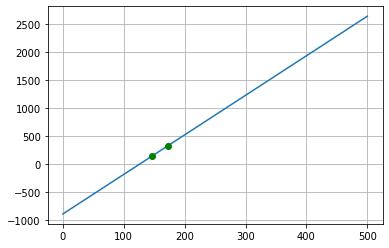

In [147]:
# Calculate the coefficients. This line answers the initial question. 
x,y = (147,173),(149, 332)
coefficients = np.polyfit(x, y, 1)

# Print the findings
# print 'a =', coefficients[0]
# print 'b =', coefficients[1]

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0,500,100)
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.plot( x[0], y[0], 'go' )
plt.plot( x[1], y[1], 'go' )
plt.grid('on')
plt.show()

In [148]:
coefficients

array([   7.03846154, -885.65384615])

In [149]:
coefficients[1]/ coefficients[0]

-125.83060109289607

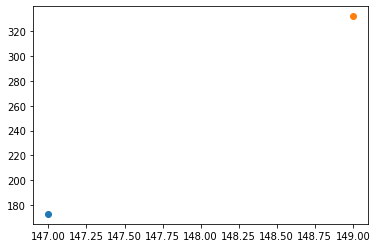

In [150]:
plt.scatter(147,173)
plt.scatter(149, 332)